---
# **Logistic Regression**
---

**1.** [**Introduction**](#Section1)<br>

**2.** [**More on Logistic Regression**](#Section2)<br>
  - **2.1** [**What is wrong with Linear Regression for Classification ?**](#Section21)
  - **2.2** [**Theory**](#Section22)
  - **2.3** [**Interpretation**](#Section23)
      - **2.3.1** [**Odds And Log odds (What? and Why?)**](#Section231)
      - **2.3.2** [**Logistic Regression and Log Odds**](#Section232)

**3.** [**Case Study (Bank Marketing)**](#Section3)<br>
  - **3.1** [**About the Dataset**](#Section31)
  - **3.2** [**Preparing Data and EDA**](#Section32)
  - **3.3** [**Model Training and Prediction**](#Section33)
  - **3.4** [**Model Evaluation**](#Section34)
      - **3.4.1** [**Accuracy Score**](#Section341)
      - **3.4.2** [**Confusion Matrix**](#Section342)
      - **3.4.2** [**Logistic Regression and Log Odds**](#Section232)
      - **3.4.2** [**Logistic Regression and Log Odds**](#Section232)
      

<a name = Section1></a>
# **1. Introduction**

- **Logistic Regression** is a classification algorithm used when the target variable is discreet or categorical.
- This technique forms relationship between features and computes probability of the categorical outcome to make decisions.

<a name = Section2></a>
# **2 More Logistic Regression**

<a name = Section21></a>
## **2.1 <u>What is wrong with Linear Regression for Classification ?</u>**
   
   - The linear regression model can work well for regression, but fails for classification. Why is that? In case of two classes, you could label one of the classes with 0 and the other with 1 and use linear regression. Technically it works and most linear model programs will spit out weights for you. But there are a few problems with this approach:  
       <br>
   
       - A linear model does not output probabilities, but it treats the classes as numbers (0 and 1) and fits the best hyperplane (for a single feature, it is a line) that minimizes the distances between the points and the hyperplane. So it simply interpolates between the points, and you cannot interpret it as probabilities.
       
       <br>
       
       - Since the predicted outcome is not a probability, but a linear interpolation between points, there is no meaningful threshold at which you can distinguish one class from the other.
       
       <br>
       
       - The image below shows application of Linear Regression model for classification of cancer tumor (malignant (1) or not malignant(0)). For distribution on the left, a threshold of 0.5 seems to work but after just adding a few more data points of malignant tumor, the threshold of 0.5 doesn't seem to work.
       
       <img src='images/linear-class-threshold-1.png' width='500' height='400' >
       
       <br>
       
       - Linear models do not extend to classification problems with multiple classes. You would have to start labeling the next class with 2, then 3, and so on. The classes might not have any meaningful order, but the linear model would force a weird structure on the relationship between the features and your class predictions. The higher the value of a feature with a positive weight, the more it contributes to the prediction of a class with a higher number, even if classes that happen to get a similar number are not closer than other classes. 
   

<a name = Section22></a>
## **2.2 <u>Theory</u>**

   - A solution for classification problem is **Logistic Regression**. Instead of fitting a straight line or a hyperplane, the **Logisitic Regression** model uses the logistic function (sigmoid) to sequeeze the output of a linear equation between 0 and 1.

   $$
   S(x) = \dfrac{1}{1+e^{-x}} ; x \in (-\infty, \infty)
   $$


   $$
   \lim_{x \to -\infty} S(x) = \lim_{x \to -\infty} \dfrac{1}{1+e^{-x}} = 0 
   $$


   $$
   \lim_{x \to \infty} S(x) = \lim_{x \to \infty} \dfrac{1}{1+e^{-x}} = 1 
   $$

       Hence,

   $$
   S(x) \in (0, 1)
   $$

   - The sigmoid function is a probabilistic function that lies in $(0, 1)$
       
   - The step from linear regression to logistic regression is kind of straightforward. For the ith observation or data point we have
   
   Linear Regression, <br>
   $$
   \hat y^{(i)} = \beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)}
   $$
   
   Logistic Regression,
   $$
   P(\hat y^{(i)} = 1 \ | \ (x_1^{(i)}, x_2^{(i)}, ....) ) = S(\hat y^{(i)}) = \dfrac{1}{1 + e^{-(\beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)})}} 
   $$
   
   
   - Applying the Logistic Regression model to the above tumor example. We can now use a threshold of 0.5 in both cases
   
   <img src='images/logistic-class-threshold-1.png' width='500' height='400' >
 

<a name = Section23></a>
## **2.3 <u>Interpretation</u>**   

<a name = Section231></a>
### **2.3.1 <u>Odds And Log odds (What? and Why?)</u>**

Let's consider an example, where we play a game of chess with an AI bot. We played 10 games in total, where we managed to win 4 games and lost the other 6 games.

   - The odds of winning with the AI bot are 4 to 6 i.e. out of a total of 10 games, we won 4 games and lost 6 games. The probability of winning would be different. Hence, 
   
   $$
   Odds = \dfrac{4}{6}
   $$
   
   $$
   probability \ of \ winning = \dfrac{4}{10}
   $$
   
   $$
   probability \ of \ losing = \dfrac{6}{10}
   $$
   
   - We can also compute odds given the probability as.
   
   $$
   Odds \ of \ winning = \dfrac{probability \ of \ winning}{probability \ of \ losing} = \dfrac{\dfrac{4}{10}}{\dfrac{6}{10}} = \dfrac{4}{6}
   $$
   
   - Now let's say we increase the number of games played between us and the AI bot to 100, 500, 1000 ... while keeping the number of games won by us as 4.
   
   $$
   Odds \ of \ winning = \dfrac{4}{6} = 0.6667
   $$
   
   $$
   Odds \ of \ winning = \dfrac{4}{96} = 0.04167
   $$
   
   $$
   Odds \ of \ winning = \dfrac{4}{496} = 0.0080645
   $$
   
   $$
   Odds \ of \ winning = \dfrac{4}{996} = 0.004016
   $$
   
   $$ \vdots $$
   
   $$
   Odds \ of \ winning = \lim_{n \to \infty} \dfrac{4}{n - 4} \approx 0 ; n \ is \ total \ no \ of \ games
   $$
   
   
   - Basically, the worse we play our odds of winning keep getting close to 0. Since we are losing more and more, this can also be called **odds against winning**. We can conclude that odds against winning stay between,
   
   $$
    Odds \ against \ winning \in (0 \ , \ 0.6667]
   $$
   
   <br>
   
   - Similarly, if we keep playing better and keep winning against the AI bot. Let's say we increase the number of games to 100, 500, 1000 such that the AI bot only manages to win 6 games each time (although hard to believe). Then,
   $$
   Odds \ of \ winning = \dfrac{4}{6} = 0.6667
   $$
   
   $$
   Odds \ of \ winning = \dfrac{94}{6} = 15.67
   $$
   
   $$
   Odds \ of \ winning = \dfrac{494}{6} = 82.33
   $$
   
   $$
   Odds \ of \ winning = \dfrac{994}{6} = 165.67
   $$
   
   $$
   \vdots
   $$
   
   $$
   Odds \ of \ winning = \lim_{n \to \infty} \dfrac{n-6}{6} \approx \infty ; n \ is \ total \ no \ of \ games
   $$
   
   - As in this case we are winning, we can term this odds as **odds in favor of winning**, which are quickly increasing as our performance gets better. Thus odds in favor of winning range between
   
   $$
    Odds \ in \ favor \ of \ winning \in [0.6667 \ , \ \infty)
   $$
   
   <br>
   
   - The plot below shall make things clear. You can simulate this plot yourself by running the code cell below.
   
   <img src='images/logodds_vs_odds.png' width='1000' height='400' >
   
   
   
   - In our scenario, we can see that the odds against us winning range from 0 to 0.6667 whereas odds in favor of us winning range from 0.6667 to infinity, which is a very large scale. This makes the magnitude of odds against look so much smaller to those in favor. **To balance the scale we use log of the odds**. The log of odds function is called Logits function.
   
   $$
   \text{Logit} \ \text{Function} = \log(odds) = \log(\dfrac{p}{1-p})
   $$

<a name = Section232></a>
### **2.3.2 <u>Logistic Regression and Log Odds</u>**

   - As discussed in the previous section, we now know what the Logit function (log odds) is. Let's apply it to our model equation of Logistic Regression.
   
       $$
       \text{Logit} \ \text{Function} = \log(odds) = \log(\dfrac{P(\hat y^{(i)} = 1 \ | \ (x_1^{(i)}, x_2^{(i)}, ....) )}{1-P(\hat y^{(i)} = 1 \ | \ (x_1^{(i)}, x_2^{(i)}, ....) )}) 
       = \log(\dfrac{P(\hat y^{(i)} = 1 \ | X^{(i)})}{1 - P(\hat y^{(i)} = 1 \ | X^{(i)})}
       $$
       
       $$
       \log(\dfrac{P(\hat y^{(i)} = 1 \ | X^{(i)})}{1 - P(\hat y^{(i)} = 1 \ | X^{(i)})}) 
       = \log( \dfrac{S(y^{(i)})}{1 - S(y^{(i)})} )
       = \log( \dfrac{\dfrac{1}{1 + e^{-(\beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)})}} }{1 - \dfrac{1}{1 + e^{-(\beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)})}} } )
       = \log( e^{(\beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)})} )
       $$
       
       $
       \ \ \ \text{Hence,}
       $
       
       $$
       \log(\dfrac{P(\hat y^{(i)} = 1 \ | X^{(i)})}{1 - P(\hat y^{(i)} = 1 \ | X^{(i)})}) 
       = \beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)}
       $$
       
       <br>
       
       - we can interpret the above equation as (similarly we did in Liner Regression) : Keeping the other coefficients constant, if we increase the coefficient $\beta_2$ (let'say) then the chances (log odds) of winning (i.e. getting $\hat y =1$) increases linearly since log odds has a linear relationship with the coefficients. Another interpretation of this can be: (we will consider $\beta_2$ as the changing parameter)

       $$
       \text{odds}_{\beta_2}
       = e ^ { \beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)} }
       $$

       $$
       \text{odds}_{2 * \beta_2}
       = e ^ { \beta_0 + \beta_1x_1^{(i)} + 2 * \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)} }
       $$

       $$
       \dfrac{\text{odds}_{2  \beta_2}}{\text{odds}_{\beta_2}}
       = e ^ {\beta_2x_2^{(i)}}
       $$

       <br>
   
       - Thus we can say that, to more precise, if we double the coefficient $\beta_2$ keeping all others constant then the odds of winning increases by a factor of $e ^ {\beta_2x_2^{(i)}}$

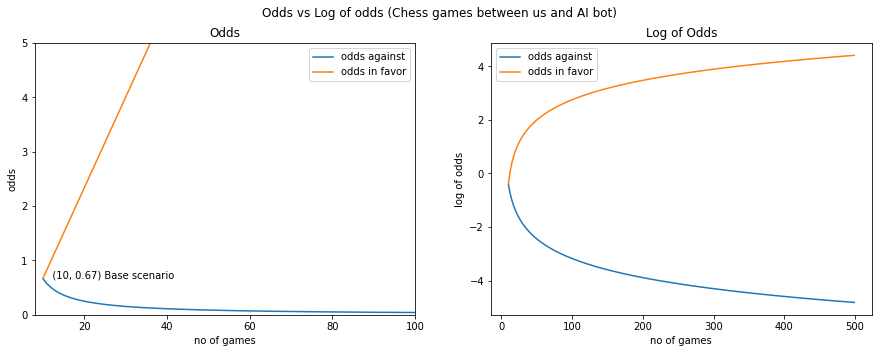

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

def odds_vs_logodds(w_us, total_games): # wins vs total_games
    
    w_AI = total_games - w_us # wins by AI

    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    plt.suptitle('Odds vs Log of odds (Chess games between us and AI bot)')

    ### plotting the change in odds as we increase the no of games
    n = np.arange(10,500)

    wins = w_us
    wins_AI = n - wins

    ax[0].plot(n ,wins/wins_AI, label='odds against')

    wins_AI = w_AI
    wins = n - wins_AI

    ax[0].plot(n ,wins/wins_AI, label='odds in favor')
    ax[0].legend()
    ax[0].set_xlabel('no of games')
    ax[0].set_ylabel('odds')
    ax[0].set_title('Odds')
    ax[0].set_xlim([8, 100])
    ax[0].set_ylim([0, 5])
    ax[0].annotate('   ({}, {}) Base scenario'.format(total_games, np.round(w_us/w_AI,2)), xy=(total_games, w_us/w_AI))
    
    
    
    ### plotting the change in log of odds as we increase the no of games
    n = np.arange(10,500)

    wins = w_us
    wins_AI = n - wins

    ax[1].plot(n ,np.log(wins/wins_AI), label='odds against')

    wins_AI = w_AI
    wins = n - wins_AI

    ax[1].plot(n ,np.log(wins/wins_AI), label='odds in favor')
    ax[1].legend()
    ax[1].set_xlabel('no of games')
    ax[1].set_ylabel('log of odds')
    ax[1].set_title('Log of Odds') 
    
    plt.show()
    
### base case, as in the scenario above we had. You can play around with the inputs (wins, total_games)
odds_vs_logodds(4, 10)

<a name = Section3></a>
# **3 Case Study (Bank Marketing)**

<a name = Section31></a>
## **3.1 About the Dataset**

   - The data is related with __direct marketing campaigns__ (phone calls) of a Portuguese banking institution.
   - The classification goal is to predict if the client will subscribe a __term deposit (variable y)__.
   - The data is related with direct marketing campaigns of a Portuguese banking institution.
   - The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the __product (bank term deposit)__ would be __('yes')__ or __('no')__ subscribed.
   - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


In [2]:
import pandas as pd
import numpy as np
bank = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/bank.csv')
bank.head() 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,29,admin.,single,university.degree,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
2,50,management,married,university.degree,no,yes,yes,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
3,31,admin.,married,high.school,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
4,32,admin.,single,high.school,no,yes,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes


<a name = Section32></a>
## **3.2 Preparing Data and EDA**

In [3]:
bank.shape

(10297, 21)

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
### descriptive statistics

bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000
mean,40.080606,261.388268,2.561134,963.609692,0.171506,0.077256,93.574206,-40.445780,3.621923,5166.850442
std,10.472190,263.722874,2.827084,184.098592,0.496992,1.576732,0.577502,4.622221,1.734170,72.492914
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,327.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,94.000000,3643.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
### data info

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10297 entries, 0 to 10296
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10297 non-null  int64  
 1   job             10297 non-null  object 
 2   marital         10297 non-null  object 
 3   education       10297 non-null  object 
 4   default         10297 non-null  object 
 5   housing         10297 non-null  object 
 6   loan            10297 non-null  object 
 7   contact         10297 non-null  object 
 8   month           10297 non-null  object 
 9   day_of_week     10297 non-null  object 
 10  duration        10297 non-null  int64  
 11  campaign        10297 non-null  int64  
 12  pdays           10297 non-null  int64  
 13  previous        10297 non-null  int64  
 14  poutcome        10297 non-null  object 
 15  emp.var.rate    10297 non-null  float64
 16  cons.price.idx  10297 non-null  float64
 17  cons.conf.idx   10297 non-null 

In [7]:
bank['job'].unique()

array(['blue-collar', 'admin.', 'management', 'technician', 'retired',
       'services', 'entrepreneur', 'self-employed', 'unemployed',
       'student', 'housemaid', 'unknown'], dtype=object)

In [8]:
#### Check unique values of the cols below

cols_unique = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign','poutcome',\
 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

for c in cols_unique:
    print("{} has these unique values {} \n".format(c, bank[c].unique()))

job has these unique values ['blue-collar' 'admin.' 'management' 'technician' 'retired' 'services'
 'entrepreneur' 'self-employed' 'unemployed' 'student' 'housemaid'
 'unknown'] 

marital has these unique values ['married' 'single' 'divorced' 'unknown'] 

education has these unique values ['basic.9y' 'university.degree' 'high.school' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate'] 

housing has these unique values ['no' 'yes' 'unknown'] 

loan has these unique values ['yes' 'no' 'unknown'] 

contact has these unique values ['telephone' 'cellular'] 

month has these unique values ['may' 'apr' 'jun' 'aug' 'jul' 'oct' 'nov' 'dec' 'sep' 'mar'] 

day_of_week has these unique values ['tue' 'wed' 'fri' 'thu' 'mon'] 

campaign has these unique values [ 3  2  1  4  5  6 14  7 21  9 12  8 17 10 20 33 29 15 23 11 18 13 19 39
 27 16 31 34 26 28 24 32 22 56 25 40] 

poutcome has these unique values ['nonexistent' 'failure' 'success'] 

pdays has these unique values [999   6   9

In [9]:
### Min , max, and null values of age column

print("Max of age is : ",bank['age'].max())
print("Min of age is : ",bank['age'].min())
print("Are there any null values ? : ", any(bank['age'].isnull()))

Max of age is :  94
Min of age is :  18
Are there any null values ? :  False


In [10]:
### Check the value counts of target column y

bank['y'].value_counts()

no     9137
yes    1160
Name: y, dtype: int64

In [11]:
### Create a function that removes columns

def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    print(q1, q3)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = df[col_name].min()
    
    print(upper_bound, lower_bound)
    
    return df[(df[col_name] > lower_bound) & (df[col_name] < upper_bound)]

In [12]:
bank.shape

(10297, 21)

In [13]:
### remove outliers from the 'age' column

bank = remove_outlier(bank, 'age')

32.0 47.0
69.5 18


In [14]:
bank.shape

(10170, 21)

In [15]:
### remove outliers from the 'campaign' column

bank = remove_outlier(bank, 'campaign')

1.0 3.0
6.0 1


In [16]:
bank.shape

(4979, 21)

In [17]:
### remove outliers from the 'duration' column

bank = remove_outlier(bank, 'duration')

109.0 339.0
684.0 0


In [18]:
bank.shape

(4621, 21)

In [19]:
### Divide the dataset into categorical and continuous based on their data types

# categorical
bank_cat=bank[['job', 'marital','default', 'education', 'loan', 'housing', \
               'contact', 'month', 'day_of_week', 'poutcome', 'y']]

# continuous
bank_cont = bank.drop(['job', 'marital','default', 'education', 'loan', 'housing', \
                       'contact', 'month', 'day_of_week', 'poutcome', 'y'], axis=1)

In [20]:
bank_cat.head()

,job,marital,default,education,loan,housing,contact,month,day_of_week,poutcome,y
0,blue-collar,married,no,basic.9y,yes,no,telephone,may,tue,nonexistent,no
1,admin.,single,no,university.degree,no,no,cellular,may,wed,nonexistent,no
3,admin.,married,unknown,high.school,no,yes,telephone,may,thu,nonexistent,no
5,admin.,single,no,university.degree,yes,yes,cellular,aug,mon,nonexistent,no
8,blue-collar,married,unknown,professional.course,no,no,cellular,may,wed,failure,no


In [21]:
bank_cont.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,46,329,3,999,0,1.1,93.994,-36.4,4.857,5191.0
1,29,132,2,999,0,-1.8,92.893,-46.2,1.281,5099.1
3,31,199,2,999,0,1.1,93.994,-36.4,4.860,5191.0
5,33,174,4,999,0,1.4,93.444,-36.1,4.963,5228.1
8,34,65,2,999,1,-1.8,92.893,-46.2,1.281,5099.1


In [22]:
### Encode the categorical values 

from sklearn.preprocessing import LabelEncoder

for c in bank_cat.columns:
    bank_cat[c] = LabelEncoder().fit_transform(bank_cat[c])

bank_cat.head()

<ipython-input-22-a9f074d2e943>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_cat[c] = LabelEncoder().fit_transform(bank_cat[c])


,job,marital,default,education,loan,housing,contact,month,day_of_week,poutcome,y
0,1,1,0,2,2,0,1,6,3,1,0
1,0,2,0,6,0,0,0,6,4,1,0
3,0,1,1,3,0,2,1,6,2,1,0
5,0,2,0,6,2,2,0,1,1,1,0
8,1,1,1,5,0,0,0,6,4,0,0


In [23]:
### Combinning categorical and continuous dataset

bank_final= pd.concat([bank_cont, bank_cat], axis = 1)

bank_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,default,education,loan,housing,contact,month,day_of_week,poutcome,y
0,46,329,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,2,2,0,1,6,3,1,0
1,29,132,2,999,0,-1.8,92.893,-46.2,1.281,5099.1,...,2,0,6,0,0,0,6,4,1,0
3,31,199,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,1,1,3,0,2,1,6,2,1,0
5,33,174,4,999,0,1.4,93.444,-36.1,4.963,5228.1,...,2,0,6,2,2,0,1,1,1,0
8,34,65,2,999,1,-1.8,92.893,-46.2,1.281,5099.1,...,1,1,5,0,0,0,6,4,0,0


<a name = Section33></a>
## **3.3 Model Training and Prediction**

In [24]:
### Separate out dependent variables X

X = bank_final.loc[: , bank_final.columns != 'y' ]
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,default,education,loan,housing,contact,month,day_of_week,poutcome
0,46,329,3,999,0,1.1,93.994,-36.4,4.857,5191.0,1,1,0,2,2,0,1,6,3,1
1,29,132,2,999,0,-1.8,92.893,-46.2,1.281,5099.1,0,2,0,6,0,0,0,6,4,1
3,31,199,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,1,1,3,0,2,1,6,2,1
5,33,174,4,999,0,1.4,93.444,-36.1,4.963,5228.1,0,2,0,6,2,2,0,1,1,1
8,34,65,2,999,1,-1.8,92.893,-46.2,1.281,5099.1,1,1,1,5,0,0,0,6,4,0


In [25]:
### Separate out the target variable y for model prediction

y = bank_final.loc[ : , bank_final.columns == 'y']
y.head()

,y
0,0
1,0
3,0
5,0
8,0


In [26]:
### Splitting data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

print("X_train - {} and X_test - {}".format(X_train.shape, X_test.shape))
print("y_train - {} and y_test - {}".format(y_train.shape, y_test.shape))

X_train - (3465, 20) and X_test - (1156, 20)
y_train - (3465, 1) and y_test - (1156, 1)


In [27]:
### Initialize the logistic regression model and training the model to get coefficients

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/ishank24/anaconda3/envs/mypythonenv/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ishank24/anaconda3/envs/mypythonenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
### Do model prediction on both test and train data

# Create model prediction on X_train data
y_pred_train = logreg.predict(X_train)

# Create model prediction for X_test
y_pred_test = logreg.predict(X_test)

print("predicting train data - {}".format(y_pred_train.shape))
print("predicting test data - {}".format(y_pred_test.shape))

predicting train data - (3465,)
predicting test data - (1156,)


<a name = Section34></a>
## **3.4 Model Evaluation**

<a name = Section341></a>
### **3.4.1 Accuracy Score**

$$
    \text{Accuracy Score} = \dfrac{\text{Total no of correctly classified observations}}{\text{Total no of observations}}
$$

In [29]:
### Evaluating model accuracy using accuracy_score

from sklearn.metrics import accuracy_score

print("Training accuracy score : {}".format(accuracy_score(y_train, y_pred_train)))
print("Testing accuracy score : {}".format(accuracy_score(y_test, y_pred_test)))

Training accuracy score : 0.9417027417027417
Testing accuracy score : 0.9290657439446367


<a name = Section342></a>
### **3.4.2 Confusion Matrix**

<img src="images/confusion_matrix.png" height="400" width="400" >

- Confusion matrix helps us evaluate the accuracy of classes for a categorical predictive algorithm (Logistic Regression). 

- The matrix plots actual values (x-axis) against the predicted values (y-axis). Each cell represents the frequency of predicted samples based on the predicted class and actual class of that cell. For example :
   
   - True negatives (TN) : No of samples that have $y_{pred} = 0 \ \text{and} \  y_{true} = 0 $ 
   - False positives (FP) : No of samples that have $y_{pred} = 1 \ \text{and} \  y_{true} = 0 $ 
   - False negatives (FN) : No of samples that have $y_{pred} = 0 \ \text{and} \  y_{true} = 1 $
   - True positives (TP) : No of samples that have $y_{pred} = 1 \ \text{and} \  y_{true} = 1 $  

- The function to plot the confusion matrix (ConfusionMatrixDisplay.from_predictions) takes the following arguments

   - y_true : array like structure of True labels
   - y_test : array like structure of predicted labels
   - normalize: can take one of the following values {"pred", "true", "all"}. Basically this parameter helps calculate probabilities.
       - "all" : divides the confusion matrix by total no of samples in test i.e. TN+FP+FN+TP
       - "pred" : divides the confusion matrix by total no of samples along the predicted axis (axis=0). In numpy it would look like (where conf_mat contains the values of confusion matrix)
       $$
       \dfrac{\text{conf_mat}}{ \text{np.sum(conf_mat, axis=0)}}
       $$
       - "true" : similarly, divides the confusion matrix by total no of samples along the actual axis (axis=1). In numpy it would look like (where conf_mat contains the values of confusion matrix)
       $$
       \dfrac{\text{conf_mat}}{ \text{np.sum(conf_mat, axis=1)}}
       $$
   - labels : this contains the array of class labels. By default, it is sorted in ascending over all the available class labels. In our case it will default to labels = [0,1] .One can change the order of labels by setting this variable.



In [44]:
a = np.array([[1044, 22], [60, 30]])

a/np.sum(a, axis=1)

array([[0.9793621 , 0.24444444],
       [0.05628518, 0.33333333]])

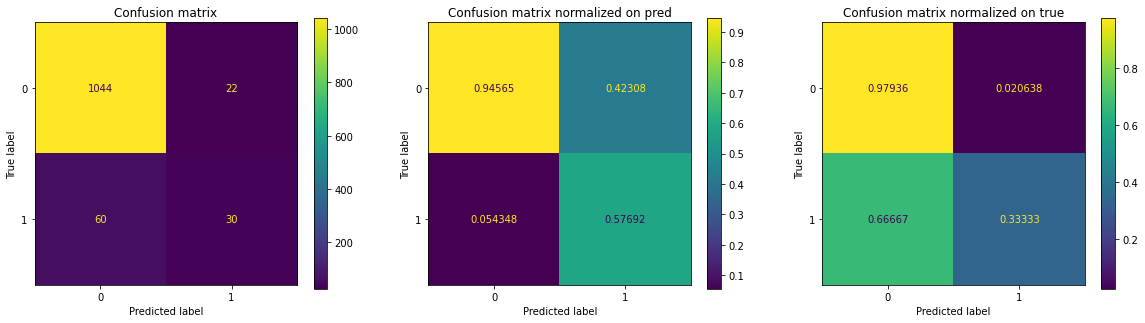

In [43]:
### Evaluating model accuracy using confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('Confusion matrix')
ax[1].set_title('Confusion matrix normalized on pred')
ax[2].set_title('Confusion matrix normalized on true')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax = ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, normalize="pred", values_format="0.5g", ax = ax[1])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, normalize="true", values_format="0.5g", ax = ax[2])

##confusion_matrix(y_test, y_pred_test, labels=[0,1])

<a name = Section343></a>
### **3.4.3 Classification Error**


$$
    \text{Classification Error} = \dfrac{\text{FP} + \text{FN}}{\text{FP} + \text{TP} + \text{TN} + \text{FN}}
    = 1 - \text{Accuracy Score}
$$


<a name = Section344></a>
### **3.4.4 Sensitivity and Specificity**

- **Sensitivity** is referred to as **True Positive Rate** i.e. the proportion of positive (class = 1) observations that were correctly identified.

- **Specificity** is referred to as **True Negative Rate** i.e. the proportion of negative (class = 0) observations that were correctly identified.

- For our case, the values turn out to be as below and as you can see from above that they are nothing but the confusion matrix values on diagonal with normalize="true"

    $ \text{Sensitivity} =  \dfrac{\text{TP}}{\text{TP}+\text{FN}} = \dfrac{30}{30 + 60} = 0.33333$   
    <br>
    $ \text{Specificity} =  \dfrac{\text{TN}}{\text{TN}+\text{FP}} = \dfrac{1044}{1044 + 22} = 0.97936$  

<a name = Section345></a>
### **3.4.5 Precision and Recall**

- **Precision** provides **measure of exactness**, i.e. what precentage of observations are labelled as positive (class = 1) are actually positive.

- **Recall** provides **measure of completeness** i.e. what precentage of observations that were actually positive (class = 1) were correctly classified as positive.

    $ \text{Precision} =  \dfrac{\text{TP}}{\text{TP}+\text{FP}} = \dfrac{30}{30 + 22} = 0.5769$   
    <br>
    $ \text{Recall} =  \dfrac{\text{TP}}{\text{TP} + \text{FN}} = \dfrac{30}{30 + 60} = 0.3333$

In [31]:
### Evaluating model accuracy using probability threshold as 0.75 

preds1 = np.where(logreg.predict_proba(X_test)[:,1] > 0.75, 1, 0)
print("Accuracy score for test data with 0.75 threshold is : {}".format(accuracy_score(y_test,preds1)))

Accuracy score for test data with 0.75 threshold is : 0.9256055363321799


In [33]:
### Evaluating model accuracy using probability threshold as 0.25

preds2 = np.where(logreg.predict_proba(X_test)[:,1] > 0.25, 1, 0)
print("Accuracy score for test data with 0.25 threshold is : {}".format(accuracy_score(y_test,preds2)))

Accuracy score for test data with 0.25 threshold is : 0.9273356401384083
